In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix #for confusion matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
df =pd.read_csv('brain_stroke.csv')

In [42]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [43]:
df.loc[df['age']<18, 'work_type'].value_counts()

children         673
Private          132
Self-employed     12
Govt_job           6
Name: work_type, dtype: int64

In [44]:
df.loc[df['age']==17, 'work_type'].value_counts()

Private          47
Self-employed     3
Govt_job          3
Name: work_type, dtype: int64

In [45]:
df.loc[df['age']==16, 'work_type'].value_counts()

Private          35
children         11
Self-employed     1
Govt_job          1
Name: work_type, dtype: int64

In [46]:
df.loc[df['age']<=16 , 'work_type']='children'

In [47]:
df.loc[df['age']==16, 'work_type'].value_counts()

children    48
Name: work_type, dtype: int64

In [48]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

##### The data is highy imbalaced.

##### The number of those without stroke(4733) overwhelms when compared to those with stroke (248).

### Visualizing the data in its original form.

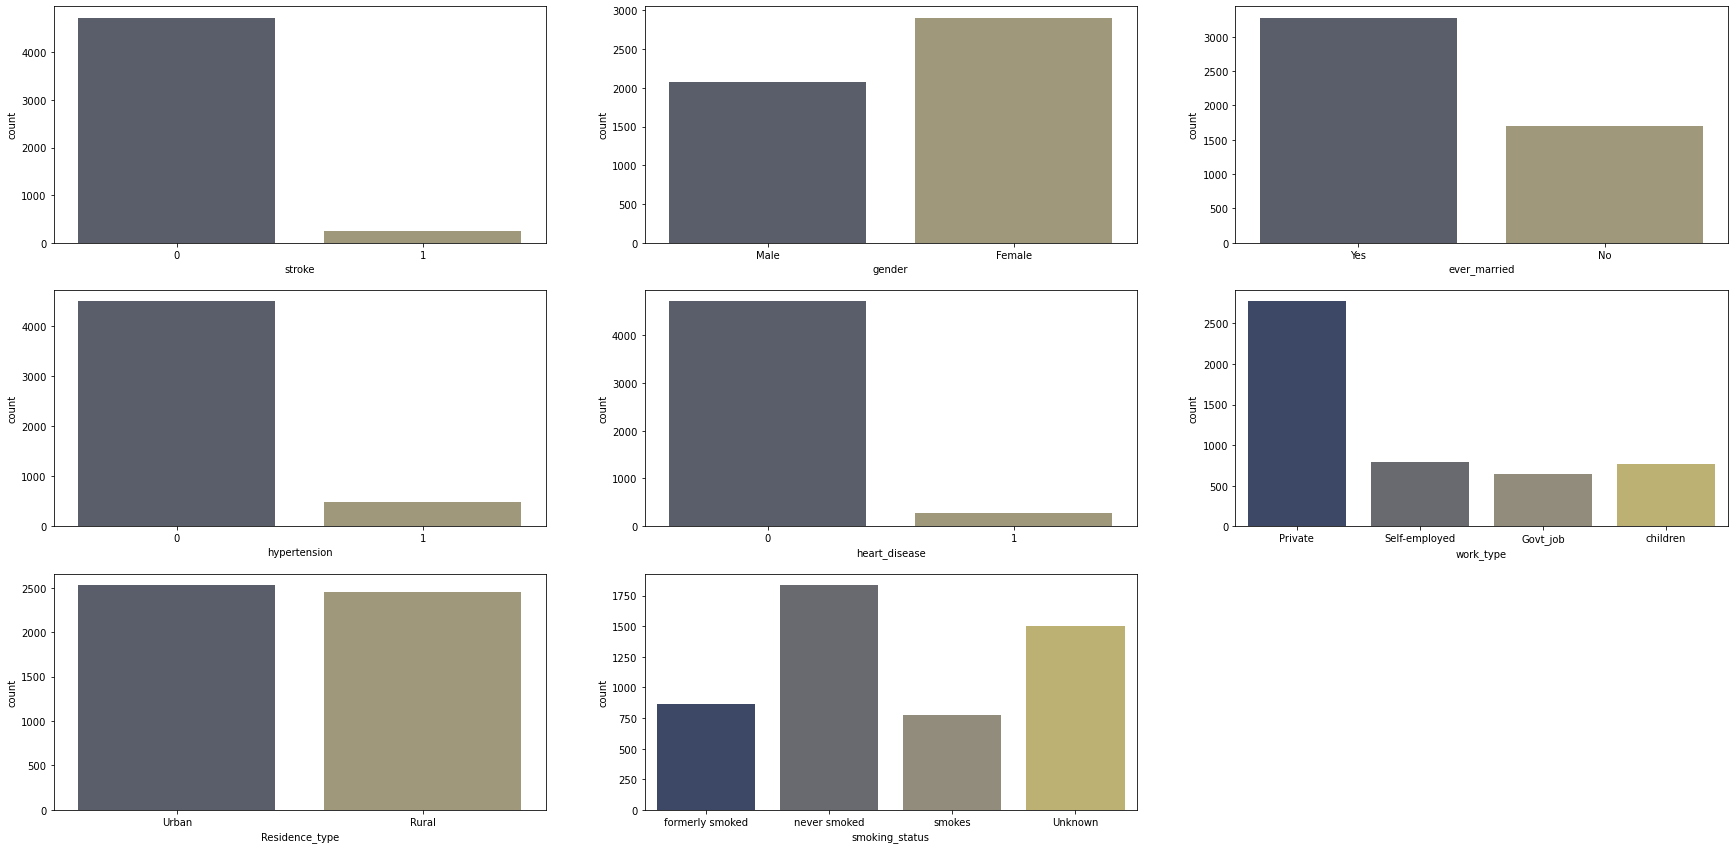

In [49]:
features = ['stroke','gender','ever_married','hypertension', 'heart_disease','work_type', 'Residence_type','smoking_status']
plt.figure(figsize =(30,20))
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.countplot(i[1], data = df, palette = 'cividis')

### Summary of visualization 1.
1. The number of people without stroke and/or other disease is overwhelmingly higher than those who have had them. This indicates that the data is highly imbalanced and will affect the outcome of trained data used in the predictive models.

2. A significant number of people in this dataset are  married, female and work in the private sector.


3. The data also shows that most of the people fall in the 'never smoked' and 'unknown' category.

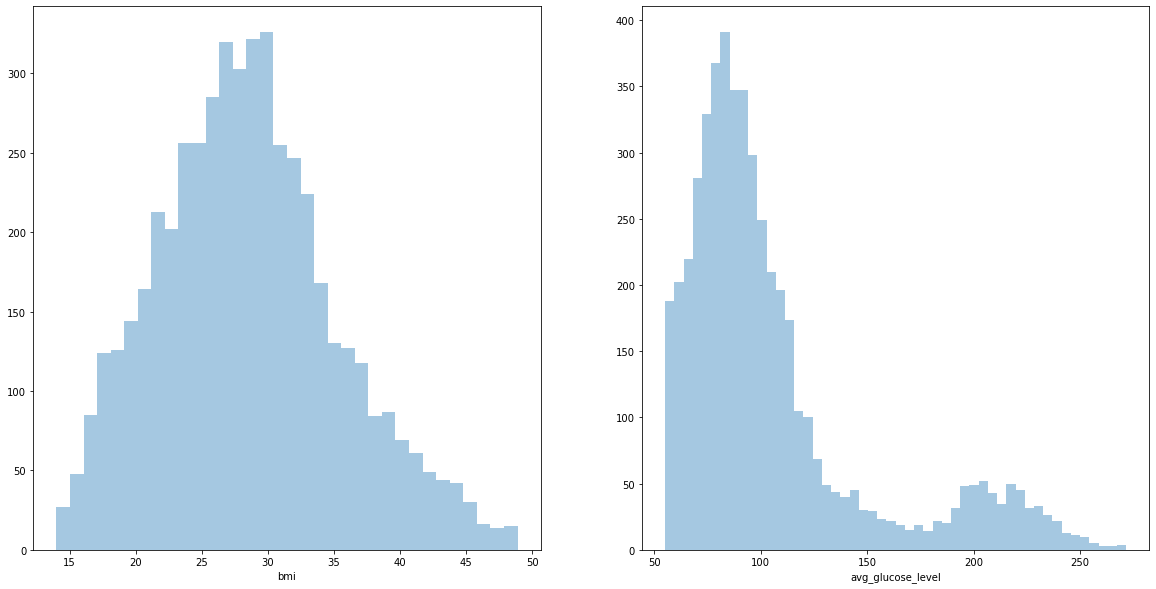

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df.bmi, kde = False)

plt.subplot(1,2,2)
sns.distplot(df.avg_glucose_level, kde = False)
plt.show()

### Summary of visualization 2.

BMI:  patients bmi peaks btween ranges 23 to 32 which indicates that a majority of patients are overweight.
AGL(average glucose levels): Peaks at 70-90 

### Confusuion Matrix Before Label Encoding

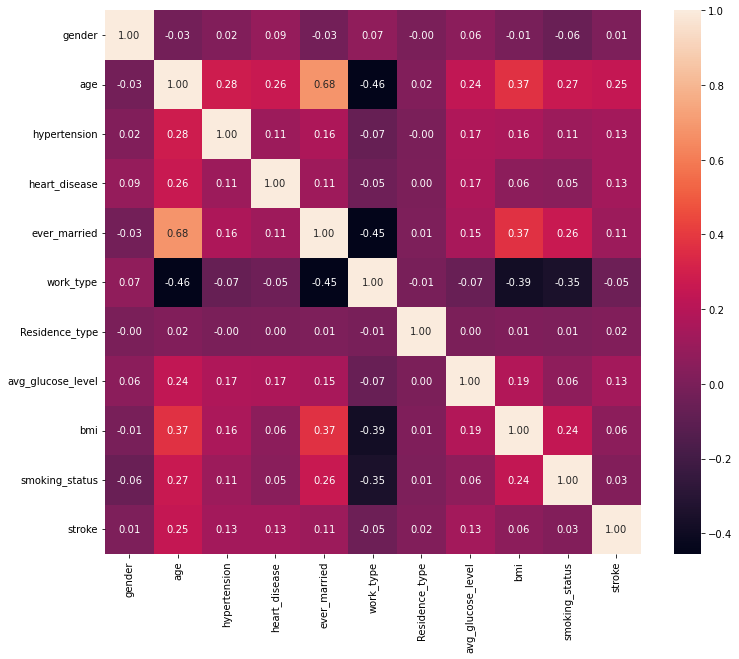

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df1.corr(), annot=True, fmt= ".2f")
plt.show()

### Data Manipulation, Exploration & Visualization.

In [52]:
new_df=df
new_df1 = df

In [53]:
# Splitting the age into bins and in a new column.
new_df['age_bins'] =pd.cut(new_df['age'],
       bins=[0,10,20,30,40,50,60,70,80,90],
       labels=['10',
               '20', 
               '30', 
               '40','50','60','70','80', '90'])

In [54]:
# Splitting bmi into bins and in a new column.
new_df['weight_status']=pd.cut(new_df['bmi'],
       bins=[0,18.5, 24.9, 30,200],
       labels=['underweight', 
               'normal', 
               'overweight', 
               'obese'])

In [55]:
#categorizing those who have had stroke and 1 more disease, all three and singularly.
def categorise(row):  
    if row['hypertension']<1 and row['heart_disease'] < 1 and row['stroke'] < 1:
        return 'low risk'
    if row['hypertension']>0 and row['heart_disease'] >0 and row['stroke'] >0:
        return 'HTN/HD/STRK'
    elif row['hypertension'] >0 and row['stroke'] >0  and row['heart_disease'] < 1:
        return 'STRK/HTN'
    elif row['heart_disease'] >0 and row['stroke']>0 and row['hypertension'] < 1:
        return 'HD/STRK'
    elif row['heart_disease']>0 and row['hypertension']>0 and row['stroke'] < 1:
        return 'HD/HTN'
    elif row['stroke']>0 and row['hypertension']<1 and row['heart_disease'] < 1:
        return 'STRK'
    elif row['hypertension']>0 and row['heart_disease']<1 and row['stroke'] < 1:
        return 'HTN'
    elif row['heart_disease']>0 and row['hypertension']<1 and row['stroke'] < 1:
        return 'HD'
    return 'unknown'

In [56]:
new_df['health_status'] = new_df.apply(lambda row: categorise(row), axis=1)

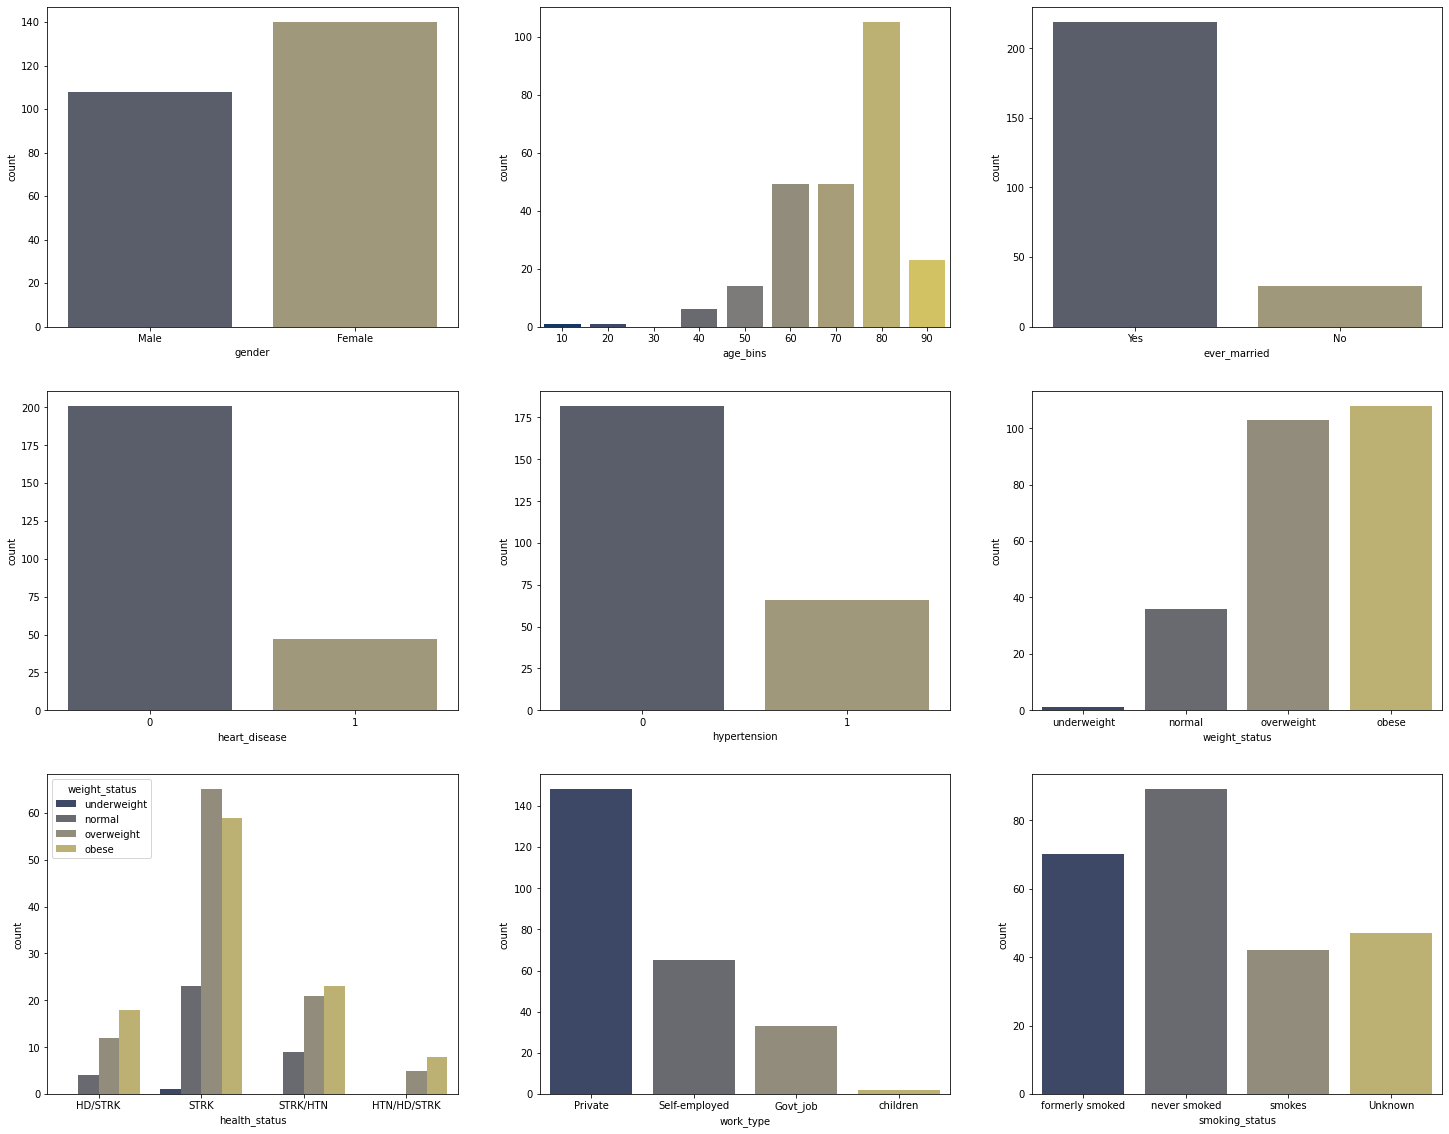

In [57]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.countplot('gender', data = new_df.query('stroke>0'), palette='cividis')

plt.subplot(3,3,2)
sns.countplot('age_bins', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,3)
sns.countplot('ever_married', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,4)
sns.countplot('heart_disease', data = new_df.query('stroke>0'),palette='cividis')
#plt.xticks(rotation = 45)

plt.subplot(3,3,5)
sns.countplot('hypertension', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,6)
sns.countplot('weight_status', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,7)
sns.countplot('health_status', data = new_df.query('stroke>0'), hue = 'weight_status',palette='cividis')

plt.subplot(3,3,8)
sns.countplot('work_type', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,9)
sns.countplot('smoking_status', data = new_df.query('stroke>0'), palette='cividis')


plt.show()  

## Further observations focusing on patients who have had stroke.

##### The above visiualizations gives insights into the data trends focusing solely on patients who have had stroke:

- There are more females than males who have had stroke.

- The age bracket peaks at the 80's range. The majority of them fall within 60 to 80 years.

- Patients with stroke are mostly overweight and obese.

- Most of the patients have never smoked. However, a large amount are listed as former smokers. 

- The number of people who have had hypertension are more than those who have had heart disease.

##### The health status chart shows the following: 

- There are those who have had one or more comobordities.i.e stroke and one or more diseases.

- Within each health bracket, the majority of patients are obese particularly within the heart disease/stroke bracket and especially those who have had all three (heart disease, hypertension and stroke). They are mostly private workers and self employed. An overwhelming amount of them are married.